In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta
import calendar as c         # c is the module
c.setfirstweekday(c.SUNDAY)  # first day Sunday America not Monday Euro
cc = c.Calendar()            # cc is the an instantiation of the class Calendar; class Calendar inside module c

from dateutil.relativedelta import *
from dateutil.rrule import *
from dateutil.parser import *


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style='darkgrid')

import copy

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Read in the prepped data

In [2]:
df = pd.read_csv('../data/df_1.csv')

In [3]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))

### Calculate hour of  the day,  and see any effects

In [4]:
df['hour_of_day'] = df['date'].apply(lambda x: x.hour)

In [5]:
df_for_plot = df['hour_of_day'].value_counts(normalize= True).to_frame()
df_for_plot = df_for_plot.sort_index()

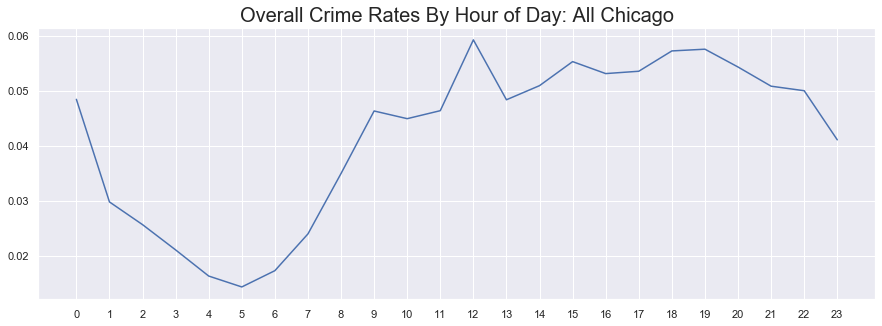

In [6]:
fig = plt.figure(figsize= (15, 5))
ax = fig.add_subplot(1,1,1)
plt.plot(df_for_plot.index, df_for_plot['hour_of_day'])
plt.xticks(range(0, 24))
ax.set_title('Overall Crime Rates By Hour of Day: All Chicago', fontsize= 20)
plt.savefig('../assets/hour_of_day_all_chicago.png')

### Definite cycles,  roughly troughing at 6 AM and peaking 6 PM,  with a Noontime spike ( to be explained soon! )

#### Homicide, Battery, and Robbery and  had a Fri-Sat-Sun influence, so see if they have hourly influences that  differ

In [7]:
df_homicide = df[df['primary_type'] == 'HOMICIDE']
df_battery  = df[df['primary_type'] == 'BATTERY']
df_robbery  = df[df['primary_type'] == 'ROBBERY']

In [8]:
homicide_times = df_homicide['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()
battery_times  = df_battery['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()
robbery_times  = df_robbery['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()

overall_times  = df_for_plot

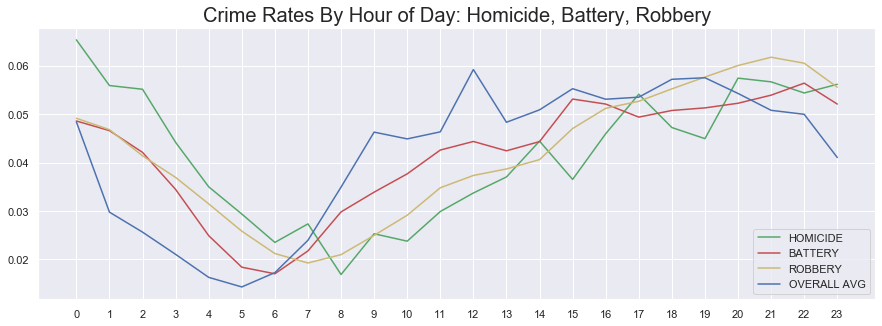

In [9]:
fig = plt.figure(figsize= (15, 5))
ax = fig.add_subplot(1,1,1)

plt.plot(homicide_times.index, homicide_times['hour_of_day'], label= 'HOMICIDE', color= 'g')
plt.plot(battery_times.index, battery_times['hour_of_day'], label= 'BATTERY', color= 'r')
plt.plot(robbery_times.index, robbery_times['hour_of_day'], label= 'ROBBERY', color= 'y')

plt.plot(overall_times.index, overall_times['hour_of_day'], label= 'OVERALL AVG', color= 'b')

plt.xticks(range(0,24))
ax.set_title('Crime Rates By Hour of Day: Homicide, Battery, Robbery', fontsize= 20)
plt.legend()
plt.savefig('../assets/hour_of_day_homicide_battery_robbery.png')

### The major violent crimes were MUCH higher overnight/wee-morning hours than overall average,  trailed below during daylight hours,  and overtook again past 8 PM or so.

#### See what other crimes that directly affect much of the populace have going

In [10]:
df_theft               = df[df['primary_type'] == 'THEFT']
df_motor_vehicle_theft = df[df['primary_type'] == 'MOTOR VEHICLE THEFT']
df_deceptive_practice  = df[df['primary_type'] == 'DECEPTIVE PRACTICE']

In [11]:
theft_times               = df_theft['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()
motor_vehicle_theft_times = df_motor_vehicle_theft['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()
deceptive_practice_times  = df_deceptive_practice['hour_of_day'].value_counts(normalize= True).to_frame().sort_index()

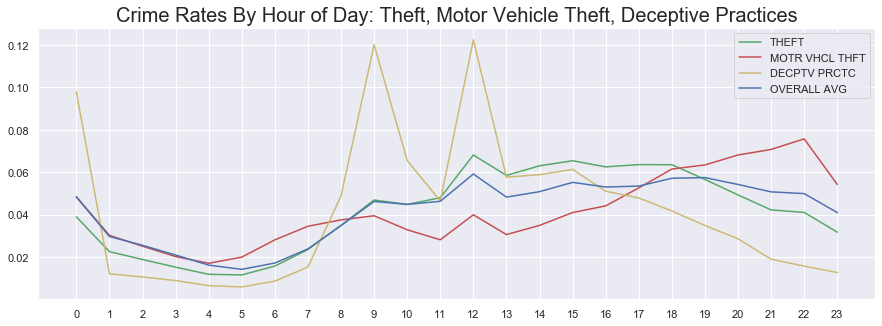

In [12]:
fig = plt.figure(figsize= (15, 5))
ax = fig.add_subplot(1,1,1)

plt.plot(theft_times.index, theft_times['hour_of_day'], label= 'THEFT', color= 'g')
plt.plot(motor_vehicle_theft_times.index, motor_vehicle_theft_times['hour_of_day'],label= 'MOTR VHCL THFT', color= 'r')
plt.plot(deceptive_practice_times.index, deceptive_practice_times['hour_of_day'], label= 'DECPTV PRCTC', color= 'y')

plt.plot(overall_times.index, overall_times['hour_of_day'], label= 'OVERALL AVG', color= 'b')

plt.xticks(range(0,24))
ax.set_title('Crime Rates By Hour of Day: Theft, Motor Vehicle Theft, Deceptive Practices', fontsize= 20)
plt.legend()
plt.savefig('../assets/hour_of_day_theft_motr_vhcl_thft_decptv_prctc.png')

## Opening and Noon Deceptive Practices;  Motor Vehicle Theft diverging higher at 6 PM.

### The stunner here is deceptive practices;  dorment overnight,  with rocket launch spikes at 8 AM and 11 AM before a big gradient down starting at around 3 PM back to dormancy overnight. 

##### Apparently stolen identities (physical and cyber), credit & ATM cards and card numbers, forged legal documents and checks, confidence games etc etc etc  get used right away at the opening of business hours that were begotten early,  and then more fraudstering in the morning for use around Noon,  (probably buying THEIR lunch with YOUR stolen credit card....),  and tapers sharply when business hours begin to wind down and/or some targets figured it out and shut it down( example being losing a credit card and didn't realize it 'till later and then called the hotline to report and cancel)

##### Apparently the deceivers use it while its hot and good and stop when they got what they wanted or the deception is found out and goes cold.

##### Midnight spike too;  IDK maybe Euro based or overseas (????)

### And it also is the largest reason for the late morning surge spike in the Overall Crime Average spoken of above!

### Motor vehicle theft diverges higher from the average at around 6 PM.

##### Perhaps the thieves wait until people come home from work with their cars --- stealing a car perhaps easier in a residential area than in a workday institutional parking lot or commercial parking garage

## Pick up workflow in next notebook.

In [13]:
df.to_csv('../data/df_2.csv', index= False)